In [1]:
import nltk
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.preprocessing import normalize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
with open('data/filtered/tripadvisor_filtered_sent_lemm.pkl' , 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [3]:
# create a function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [4]:
nltk_stpwd = stopwords.words('english')
stop_words_stpwd = get_stop_words('en')
merged_stopwords = list(set(nltk_stpwd + stop_words_stpwd))
merged_stopwords = merged_stopwords + ['nice','great','year','time','good','friendly', 'deer', 'valley', 'resort',
                                      'fun','day','ticket', 'park', 'city', 'place', 'ski', 'skiing','skier','slope',
                                      'zermatt','matterhorn','cable', 'creek', 'beaver','best','one','run','aspen',
                                      'take']

# test add run
# test add stay - beginner and restaurant topics got bucketed into one

In [5]:
# TFIDF
vectorizer = TfidfVectorizer(
                         stop_words=merged_stopwords, 
                         token_pattern="\\b[a-z][a-z]+\\b", 
                         min_df=35,
                         max_df=0.7
                        )
counts = vectorizer.fit_transform(df['lem_sent_text'])
feature_names = vectorizer.get_feature_names()

# NMF
components_count = 20

model = NMF(n_components=components_count, init='random', max_iter=100, random_state=101)
topic_distr = model.fit_transform(counts)

In [6]:
print_top_words(model, feature_names, 10)

# topics
# powder: 5
# family: 10
# beginner: 19
# lessons for kids: 2
# lessons: 12
# food/restaurants: 8
# crowded: 8

Topic #0: go, want, wait, ca, way, week, weekend, never, every, tube
Topic #1: back, come, definitely, next, wait, ca, sure, return, soon, never
Topic #2: kid, first, lesson, school, instructor, experience, learn, adult, old, snowboard
Topic #3: recommend, highly, definitely, visit, anyone, return, trip, stay, overall, summer
Topic #4: mountain, top, ride, big, coaster, trail, gondola, small, bike, side
Topic #5: snow, condition, make, powder, fresh, even, season, weather, excellent, week
Topic #6: view, beautiful, top, amazing, spectacular, ride, amaze, fantastic, breathtaking, lake
Topic #7: love, absolutely, every, winter, come, visit, return, old, son, always
Topic #8: lift, line, long, wait, chair, short, minute, slow, ride, open
Topic #9: staff, helpful, super, always, excellent, service, everyone, instructor, rental, extremely
Topic #10: family, trip, vacation, perfect, whole, friend, wonderful, child, holiday, weekend
Topic #11: really, enjoy, like, experience, people, everyone

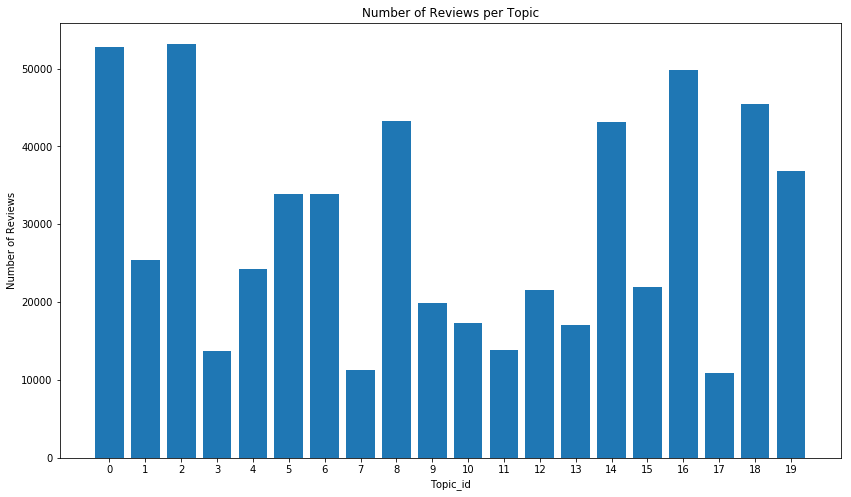

In [7]:
resort_top = np.argmax(topic_distr, axis=1)
np.bincount(resort_top)

plt.figure(figsize=(14,8))
plt.bar(np.arange(0,components_count), height = np.bincount(resort_top))
plt.xlabel('Topic_id')
plt.ylabel('Number of Reviews')
plt.xticks(np.arange(0,components_count))
plt.title('Number of Reviews per Topic');

In [8]:
df.head()

,rev_id,sentence,lem_sent_token,lem_sent_text
0,0,"Hiking, Food, Fun Love the hiking trails to th...","[hiking, ,, food, ,, fun, love, the, hiking, t...","hiking , food , fun love the hiking trail to t..."
1,0,Amazing panoramic views are perfect for photos...,"[amaze, panoramic, view, be, perfect, for, pho...",amaze panoramic view be perfect for photo to c...
2,0,I fell in love with the cows!!,"[i, fell, in, love, with, the, cow, !, !]",i fell in love with the cow ! !
3,0,Particularly one that followed us up the hill.,"[particularly, one, that, follow, u, up, the, ...",particularly one that follow u up the hill .
4,0,One of my favorite moments was taking selfies ...,"[one, of, my, favorite, moment, be, take, self...",one of my favorite moment be take selfies with...


In [9]:
# print sentences associated with the topic

# Topic #0: go, want, way, ca, week, like, every, wait, never, tube
# Topic #1: experience, first, awesome, trip, visit, overall, wonderful, make, ever, amazing
# Topic #2: lot, people, terrain, parking, variety, trail, level, restaurant, activity, blue
# Topic #3: kid, enjoy, really, school, instructor, learn, lesson, adult, old, young
# Topic #4: family, trip, vacation, perfect, whole, friend, child, holiday, wonderful, young
# Topic #5: area, small, beautiful, large, visit, big, many, base, huge, also
# Topic #6: beginner, recommend, intermediate, highly, blue, trail, green, level, black, expert
# Topic #7: snow, condition, make, much, powder, fresh, even, season, weather, open
# Topic #8: food, restaurant, price, lodge, expensive, bar, also, drink, service, reasonable
# Topic #9: well, worth, groom, maintain, trail, visit, trip, piste, keep, organize
# Topic #10: get, easy, early, around, hour, busy, crowd, way, much, need
# Topic #11: mountain, top, big, coaster, trail, small, like, biking, side, bike
# Topic #12: take, lesson, top, gondola, ride, hour, minute, way, bus, walk
# Topic #13: excellent, stay, service, condition, hotel, night, week, lodge, school, village
# Topic #14: line, long, wait, people, crowd, never, weekend, short, zip, minute
# Topic #15: staff, helpful, super, always, everyone, rental, extremely, instructor, really, help
# Topic #16: view, beautiful, top, amazing, spectacular, amaze, fantastic, breathtaking, enjoy, lake
# Topic #17: lift, chair, slow, open, price, queue, high, fast, close, rental
# Topic #18: love, absolutely, every, winter, come, visit, old, return, son, much
# Topic #19: back, come, definitely, next, wait, ca, sure, return, soon, recommend

for sent_i in np.argsort(topic_distr[:,2])[-10:]:
    
    print(df.iloc[sent_i,1])
    print("-"*30)

Both the kids had a great time.
------------------------------
Great for kids.
------------------------------
Are you kidding me?
------------------------------
All 3 Kids had a great time.
------------------------------
Woodlot was good, but $25 for kids??
------------------------------
Great place to take kids.
------------------------------
Great if you have kids This is a fun place.
------------------------------
Great if you have kids This is a fun place.
------------------------------
great for kids!
------------------------------
good place for kids This was a great place for the kids to have a lesson.
------------------------------


In [10]:
# normalize the weights
topics = normalize(topic_distr, norm='l1', axis=1, copy=True, return_norm=False)

topics_df  = pd.DataFrame(data=topics)

In [11]:
df_topics = pd.merge(df, topics_df, left_index=True, right_index=True)

In [12]:
df_topics.head()

,rev_id,sentence,lem_sent_token,lem_sent_text,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0,"Hiking, Food, Fun Love the hiking trails to th...","[hiking, ,, food, ,, fun, love, the, hiking, t...","hiking , food , fun love the hiking trail to t...",0.000000,0.000000,0.000000,0.000000,0.017655,0.002429,...,0.000000,0.000000,0.000000,0.009472,0.000000,0.042854,0.000000,0.001253,0.356053,0.066909
1,0,Amazing panoramic views are perfect for photos...,"[amaze, panoramic, view, be, perfect, for, pho...",amaze panoramic view be perfect for photo to c...,0.000000,0.000000,0.014001,0.000000,0.000000,0.036762,...,0.042868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090392
2,0,I fell in love with the cows!!,"[i, fell, in, love, with, the, cow, !, !]",i fell in love with the cow ! !,0.000000,0.000000,0.000000,0.000000,0.000000,0.001191,...,0.000000,0.000000,0.000000,0.000000,0.002447,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,Particularly one that followed us up the hill.,"[particularly, one, that, follow, u, up, the, ...",particularly one that follow u up the hill .,0.074463,0.004183,0.049262,0.000468,0.000000,0.010345,...,0.026221,0.017222,0.014944,0.040240,0.106054,0.024237,0.087311,0.042348,0.031760,0.339076
4,0,One of my favorite moments was taking selfies ...,"[one, of, my, favorite, moment, be, take, self...",one of my favorite moment be take selfies with...,0.081168,0.018816,0.002654,0.004433,0.262880,0.029675,...,0.128335,0.031209,0.293535,0.025467,0.000121,0.000240,0.024346,0.021643,0.000000,0.008281


In [13]:
df_topics['polarity'] = [TextBlob(sent).sentiment[0] for sent in df_topics['sentence']]

In [14]:
df_topics['subjectivity'] = [TextBlob(sent).sentiment[1] for sent in df_topics['sentence']]

In [15]:
df_topics['sent_score'] = df_topics['polarity'] * df_topics['subjectivity']

In [16]:
# pickle lemmatized sentence file
with open('data/filtered/tripadvisor_filtered_sent_sentiment_score.pkl', 'wb') as picklefile:
    pickle.dump(df_topics, picklefile)

# TSNE

In [ ]:
topic_distr_10k = topic_distr[-10000:,:]

In [ ]:
doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(topic_distr_10k)

In [ ]:
rev_max_top = np.argmax(topic_distr_10k, axis=1)

In [ ]:
topics = list(range(len(model.components_)))

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", components_count))

    # We create a scatter plot.
    f = plt.figure(figsize=(16, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(components_count):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.title(f'TSNE Plot with {components_count} topics', size=18)

    return f, ax, sc, txts

In [ ]:
scatter(doc_plot,rev_max_top);

In [ ]:
# topics
# powder: 4
# family: 9
# beginner: 3
# lessons: 2
# hotels/restaurants: 7
# crowded: 8

In [ ]:
#0: noise
#1: summer activities
#2: lessons
#3: beginner
#4: powder
#5: hotels/staff
#6: summer activities 2
#7: resort village/restaurants
#8: crowded
#9: family

In [ ]:
df.head()